In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("OA-fragment-4_parameter_changes.csv")
df

,Unnamed: 0,smirks,parameter,before,after,change
0,0,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_0_k1,0.000000,0.000000,0.0
1,1,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_0_k2,0.000000,0.000000,0.0
2,2,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_0_k3,-0.224456,-0.224456,0.0
3,3,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_0_k4,0.000000,0.000000,0.0
4,4,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_1_k1,0.000000,0.000000,0.0
...,...,...,...,...,...,...
59,59,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_14_k4,0.000000,0.000000,0.0
60,60,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_15_k1,0.000000,0.000000,0.0
61,61,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_15_k2,1.090788,1.090788,0.0
62,62,[#6H1X3x2r6+0a:1](-;!@[#1H0X1x0!r+0A])(:;@[#6H...,smirks_15_k3,0.000000,0.000000,0.0


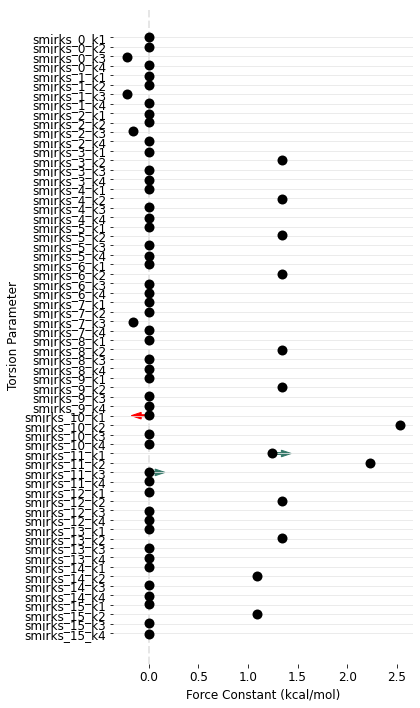

In [41]:
plt.rc('font', size=12)
ax = plt.figure(figsize=(6,10))
#add start points
ax = sns.stripplot(data=df,
                   x='before',
                   y='parameter',
                   orient='h',
                   order=df['parameter'],
                   size=10, #Diameter of the markers
                   color='black')
ax.grid(axis='y', color='0.9')

#add arrows to plot only if the parameter changed by more than 1e-3 kcal/mol
for i in range(len(df.index)):
    term = df.iloc[i]
    if abs(term["change"]) > 1e-3:
        if term["after"] > term["before"]:
            arrow_color = '#347768'
        elif term["after"] < term["before"]:
            arrow_color = 'red'
        else:
            arrow_color = 'black'
        ax.arrow(term["before"],
                 i,
                 term["change"],
                 0,
                 head_width=0.7,
                 head_length=0.1,
                 width=0.2,#0.1,
                 fc=arrow_color,
                 ec=arrow_color)
ax.axvline(x=0, color='0.9', ls='--', lw=2, zorder=0)
ax.set_xlabel('Force Constant (kcal/mol)')
ax.set_ylabel('Torsion Parameter')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig("OA-fragment-4_parameter_changes_reformatte.pdf")#, bbox_inches = "tight")
#plt.savefig(f"{args.id}/{args.id}_parameter_change.pdf", bbox_inches = "tight")